### Summary Statistics

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
arr = np.array([[1,2,np.nan],[np.nan,3,4]])

In [3]:
arr

array([[ 1.,  2., nan],
       [nan,  3.,  4.]])

In [4]:
dframe1 = DataFrame(arr,index=['A','B'],columns=('One','Two','Three'))
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [5]:
dframe1.sum() # Sum on columns

One      1.0
Two      5.0
Three    4.0
dtype: float64

In [6]:
dframe1.sum(1) #sum on rows

A    3.0
B    7.0
dtype: float64

In [7]:
dframe1.min()  #returns min on columns

One      1.0
Two      2.0
Three    4.0
dtype: float64

In [8]:
dframe1.idxmin() #Returns index of each min value

One      A
Two      A
Three    B
dtype: object

In [9]:
dframe1.min(1)  #Returns min on rows

A    1.0
B    3.0
dtype: float64

In [10]:
# Max will work similarlty to min

In [11]:
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [12]:
dframe1.cumsum()   #cumulative sum on columns

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,5.0,4.0


In [13]:
1 + np.NaN  # NaN + any valid number is NaN

nan

In [14]:
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [15]:
dframe1.describe()

,One,Two,Three
count,1.0,2.000000,1.0
mean,1.0,2.500000,4.0
std,NaN,0.707107,NaN
min,1.0,2.000000,4.0
25%,1.0,2.250000,4.0
50%,1.0,2.500000,4.0
75%,1.0,2.750000,4.0
max,1.0,3.000000,4.0


In [16]:
from IPython.display import YouTubeVideo

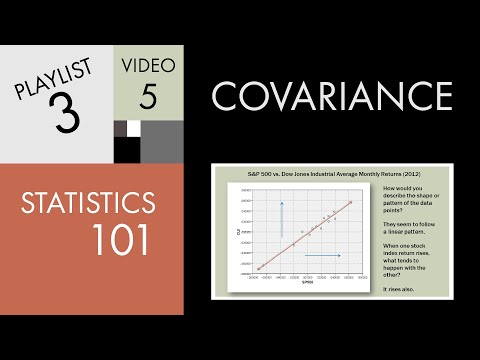

In [17]:
YouTubeVideo('xGbpuFNR1ME')

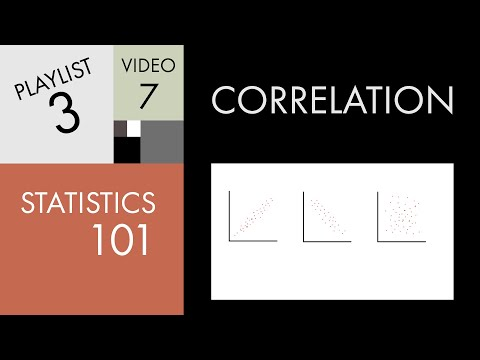

In [18]:
YouTubeVideo('4EXNedimDMs')

In [19]:
import pandas_datareader as pdr
import datetime

/home/balaji/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [20]:
prices = pdr.get_data_yahoo(['CTSH','XOM'],start=datetime.datetime(2019,1,1),end=datetime.datetime(2020,3,24))['Adj Close']

In [21]:
prices

Symbols,CTSH,XOM
Date,,
2019-01-02,62.109997,65.563515
2019-01-03,60.150909,64.556870
2019-01-04,62.710526,66.937065
2019-01-07,62.612076,67.285156
2019-01-08,63.320885,67.774361
...,...,...
2020-03-18,47.470001,33.119999
2020-03-19,46.490002,34.430000
2020-03-20,44.099998,32.740002


In [22]:
volume = pdr.get_data_yahoo(['CTSH','XOM'],start=datetime.datetime(2019,1,1),end=datetime.datetime(2020,3,24))['Volume']

In [23]:
volume

Symbols,CTSH,XOM
Date,,
2019-01-02,3045600.0,16727200.0
2019-01-03,3895700.0,13866100.0
2019-01-04,4885600.0,16043600.0
2019-01-07,3940400.0,10844200.0
2019-01-08,3427500.0,11439000.0
...,...,...
2020-03-18,7214400.0,54036400.0
2020-03-19,5650600.0,49412400.0
2020-03-20,6541200.0,76534600.0


In [24]:
rets = prices.pct_change()

In [25]:
rets

Symbols,CTSH,XOM
Date,,
2019-01-02,NaN,NaN
2019-01-03,-0.031542,-0.015354
2019-01-04,0.042553,0.036870
2019-01-07,-0.001570,0.005200
2019-01-08,0.011321,0.007271
...,...,...
2020-03-18,-0.052495,-0.100245
2020-03-19,-0.020645,0.039553
2020-03-20,-0.051409,-0.049085


In [26]:
# Correlation of the stocks
corr = rets.corr

In [27]:
corr

<bound method DataFrame.corr of Symbols         CTSH       XOM
Date                          
2019-01-02       NaN       NaN
2019-01-03 -0.031542 -0.015354
2019-01-04  0.042553  0.036870
2019-01-07 -0.001570  0.005200
2019-01-08  0.011321  0.007271
...              ...       ...
2020-03-18 -0.052495 -0.100245
2020-03-19 -0.020645  0.039553
2020-03-20 -0.051409 -0.049085
2020-03-23 -0.056463 -0.039401
2020-03-24  0.115357  0.126868

[309 rows x 2 columns]>

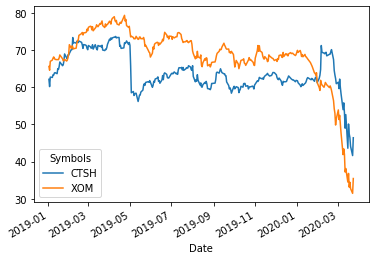

In [28]:
%matplotlib inline
prices.plot()

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

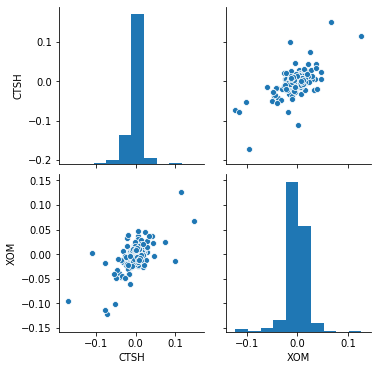

In [30]:
sns.pairplot(rets)

### Handing missing Data

In [31]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [32]:
data = Series(['one','two',np.nan,'four',np.nan])

In [33]:
data

0     one
1     two
2     NaN
3    four
4     NaN
dtype: object

In [34]:
data.isnull()

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [35]:
data[data.isnull()] = 'no values'

In [36]:
data.dropna()  #Drop null values from a series

0          one
1          two
2    no values
3         four
4    no values
dtype: object

In [37]:
dframe = DataFrame([[1,2,3],[np.nan,5,6],[7,8,np.nan],[np.nan,np.nan,np.nan]])

In [38]:
dframe

,0,1,2
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,7.0,8.0,NaN
3,NaN,NaN,NaN


In [39]:
clean_dframe = dframe.dropna() #Removes rows there there is atleast one NaN.
clean_dframe

,0,1,2
0,1.0,2.0,3.0


In [40]:
clean_dframe = dframe.dropna(axis=1)  # specifying axis will apply on the columns
clean_dframe

""
0
1
2
3


In [41]:
dframe[:1]

,0,1,2
0,1.0,2.0,3.0


In [42]:
npn = np.nan
dframe2 = DataFrame([[1,2,3,npn],[2,npn,5,6],[npn,7,npn,9],[1,npn,npn,npn]])

In [43]:
dframe2

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0
2,NaN,7.0,NaN,9.0
3,1.0,NaN,NaN,NaN


In [44]:
dframe2.dropna(thresh=3) # Threshold checks for altlease those many number of valid columns and return rows

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0


In [45]:
dframe2

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0
2,NaN,7.0,NaN,9.0
3,1.0,NaN,NaN,NaN


In [46]:
dframe2.fillna(1)  #fills all NaN with the value specified

,0,1,2,3
0,1.0,2.0,3.0,1.0
1,2.0,1.0,5.0,6.0
2,1.0,7.0,1.0,9.0
3,1.0,1.0,1.0,1.0


In [47]:
dframe2

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0
2,NaN,7.0,NaN,9.0
3,1.0,NaN,NaN,NaN


In [48]:
dframe2.fillna({0:0,1:2,2:4,3:9})  #Passing dictionaries will apply on columns

,0,1,2,3
0,1.0,2.0,3.0,9.0
1,2.0,2.0,5.0,6.0
2,0.0,7.0,4.0,9.0
3,1.0,2.0,4.0,9.0


### Index Hierarchy

In [49]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn

In [50]:
ser = Series(randn(6),index=[[1,1,1,2,2,2],['a','b','c','a','b','c']])  #Passing mulitple indices

In [51]:
ser

1  a    0.801443
   b    1.129380
   c   -1.006658
2  a   -0.598673
   b   -1.013260
   c    0.587745
dtype: float64

In [52]:
ser.index

MultiIndex([(1, 'a'),
            (1, 'b'),
            (1, 'c'),
            (2, 'a'),
            (2, 'b'),
            (2, 'c')],
           )

In [53]:
ser[1,'a']  #specifying index levels

0.8014426471903283

In [54]:
ser[:,'a']  #specifying index levels

1    0.801443
2   -0.598673
dtype: float64

In [55]:
dframe = ser.unstack()    #unstack creates a dataframe from multi index level series

In [56]:
dframe

,a,b,c
1,0.801443,1.12938,-1.006658
2,-0.598673,-1.01326,0.587745


In [92]:
dframe2 = DataFrame(np.arange(16).reshape(4,4),index=[['a','a','b','b'],[1,2,1,2]],columns=[['NY','NY','LA','SF'],['cold','hot','hot','cold']])

In [93]:
dframe2

NY      LA   SF
    cold hot hot cold
a 1    0   1   2    3
  2    4   5   6    7
b 1    8   9  10   11
  2   12  13  14   15

In [95]:
dframe2[:2]['NY']['hot']

a  1    1
   2    5
Name: hot, dtype: int64

In [96]:
dframe2.index.names = ['Index_1','Index_2']
dframe2.columns.names = ['Cities','temp']

In [97]:
dframe2

Cities            NY      LA   SF
temp            cold hot hot cold
Index_1 Index_2                  
a       1          0   1   2    3
        2          4   5   6    7
b       1          8   9  10   11
        2         12  13  14   15

In [98]:
dframe2.swaplevel('Cities','temp',axis=1)   # Swapping axis

temp            cold hot     cold
Cities            NY  NY  LA   SF
Index_1 Index_2                  
a       1          0   1   2    3
        2          4   5   6    7
b       1          8   9  10   11
        2         12  13  14   15

In [99]:
dframe2.sort_index(axis=1,level=0)

Cities           LA   NY       SF
temp            hot cold hot cold
Index_1 Index_2                  
a       1         2    0   1    3
        2         6    4   5    7
b       1        10    8   9   11
        2        14   12  13   15

In [100]:
dframe2.sum(level='temp',axis=1)  #Sum based on axis

temp             cold  hot
Index_1 Index_2           
a       1           3    3
        2          11   11
b       1          19   19
        2          27   27

In [104]:
dframe2.sum()

Cities  temp
NY      cold    24
        hot     28
LA      hot     32
SF      cold    36
dtype: int64

In [102]:
dframe2

Cities            NY      LA   SF
temp            cold hot hot cold
Index_1 Index_2                  
a       1          0   1   2    3
        2          4   5   6    7
b       1          8   9  10   11
        2         12  13  14   15